In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from functions import *
from scipy.stats import gaussian_kde
def scatter_with_gaussian_kde(ax, x, y, size):
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(x, y, c=z, s=size)
    
from matplotlib_venn import venn2, venn3
import seaborn as sns
from scipy import stats

# 32 Beta-Agarases

In [2]:
bagar_exp = pd.read_csv('../data/casestudy/beta_agarase.csv')
bagar_pred = pd.read_csv('../data/casestudy/pred_bagarase.csv')
bagar_pred['uniprot_id'] = list(bagar_exp.uniprot_id)
exp_topts = list(bagar_exp.topt)
pred_topts = list(bagar_pred.pred_topt)
print(get_rmse(np.array(exp_topts),np.array(pred_topts) ))
print(get_mae(np.array(exp_topts),np.array(pred_topts) ))

8.94415
7.405023


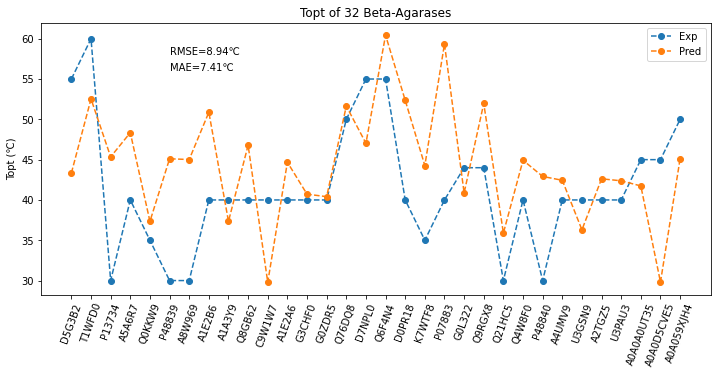

In [9]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(bagar_exp.uniprot_id,exp_topts,'--',marker='o',label='Exp')
ax.plot(bagar_exp.uniprot_id,pred_topts,'--',marker='o',label='Pred')
ax.legend()
plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 );
ax.set_ylabel('Topt (\u2103)')
ax.text(x=5,y=58,s='RMSE=8.94\u2103')
ax.text(x=5,y=56,s='MAE=7.41\u2103')
ax.set_title('Topt of 32 Beta-Agarases')
# plt.savefig('../../../Topt_paper/Figures/pred_betaAgar.svg',format='svg',dpi=150)

In [11]:
exp_top10=list(bagar_exp.sort_values(by='topt', ascending=False)['uniprot_id'])[:10]
pred_top10=list(bagar_pred.sort_values(by='pred_topt', ascending=False)['uniprot_id'])[:10]

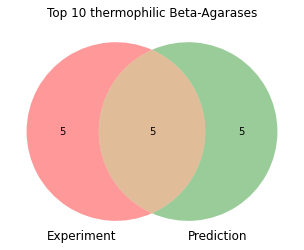

In [12]:
fig,ax=plt.subplots()
venn2([set(exp_top10),set(pred_top10)],set_labels=('Experiment','Prediction'),ax=ax)
ax.set_title('Top 10 thermophilic Beta-Agarases')
# plt.savefig('../../../Topt_paper/Figures/venn_betaAgar.svg',format='svg',dpi=150)

# Organisms different contexts

In [23]:
pred_diffthermo = pd.read_csv('../data/Topt/pred_diffthermo.csv')
diffthermo_data = pd.read_csv('../data/Topt/diffthermo_data.csv')

In [35]:
diffthermo_data['pred_topt'] = list(pred_diffthermo.pred_topt)
meso_data = diffthermo_data[diffthermo_data['class']=='Mesophile'].reset_index()
thermo_data = diffthermo_data[(diffthermo_data['class']=='Thermophile') |\
                              (diffthermo_data['class']=='Hyperthermophile')].reset_index()

In [61]:
print( get_rmse( meso_data['topt'], meso_data['pred_topt']) )
print( get_mae( meso_data['topt'], meso_data['pred_topt']) )

10.861336
8.560843


In [62]:
print( get_rmse( thermo_data['topt'], thermo_data['pred_topt']) )
print( get_mae( thermo_data['topt'], thermo_data['pred_topt']) )

14.074325
10.806105


In [48]:
pv = stats.ttest_ind(list(meso_data['pred_topt']), list(thermo_data['pred_topt'])).pvalue
print(pv)

1.659185445420498e-50


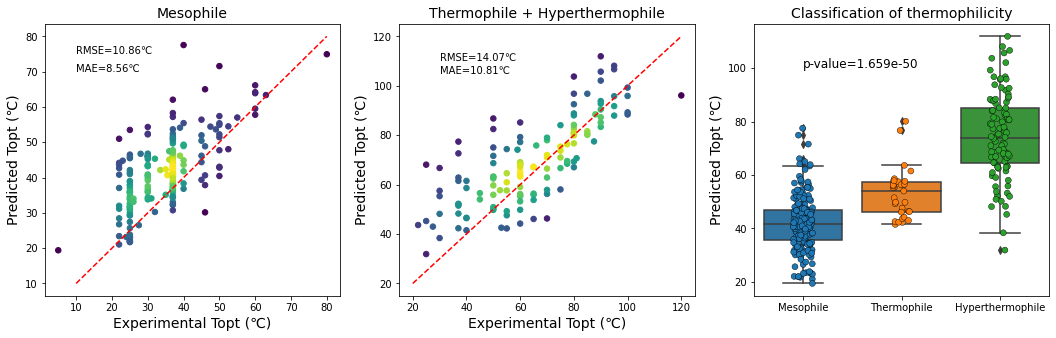

In [67]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
scatter_with_gaussian_kde(axs[0], meso_data['topt'], meso_data['pred_topt'], size = 30)
axs[0].plot([10,80],[10,80],'r--')
axs[0].set_title('Mesophile',fontsize=14)
scatter_with_gaussian_kde(axs[1], thermo_data['topt'], thermo_data['pred_topt'], size = 30)
axs[1].plot([20,120],[20,120],'r--')
axs[1].set_title('Thermophile + Hyperthermophile',fontsize=14)
for ax in axs[0],axs[1]:
    ax.set_xlabel('Experimental Topt (\u2103)',fontsize=14)
    ax.set_ylabel('Predicted Topt (\u2103)',fontsize=14)
sns.boxplot(data=diffthermo_data, x='class',y='pred_topt',
            order =['Mesophile','Thermophile','Hyperthermophile'] ,ax=axs[2])
sns.stripplot(data=diffthermo_data, x='class',y='pred_topt',
            order =['Mesophile','Thermophile','Hyperthermophile'] ,size=6,edgecolor='black',linewidth=0.4,ax=axs[2])
axs[2].text(x=0,y=100,s='p-value=1.659e-50',fontsize=12)
axs[2].set_ylabel('Predicted Topt (\u2103)',fontsize=14)
axs[2].set_xlabel('')
axs[2].set_title('Classification of thermophilicity',fontsize=14)

axs[0].text(x=10,y=75,s='RMSE=10.86\u2103')
axs[0].text(x=10,y=70,s='MAE=8.56\u2103')
axs[1].text(x=30,y=110,s='RMSE=14.07\u2103')
axs[1].text(x=30,y=105,s='MAE=10.81\u2103')
# plt.savefig('../../../Topt_paper/Figures/diff_thermoph.svg',format='svg',dpi=150)